In [2]:
import cv2
import matplotlib.pyplot as plt
from img_util import imshow

In [3]:
cat1 = cv2.imread(r"C:\Users\mk744\OneDrive - Poornima University\Pictures\cat.jpg")
cat2 = cv2.imread(r"C:\Users\mk744\OneDrive - Poornima University\Pictures\cat3.jpeg.jpg")

dog1 = cv2.imread(r"C:\Users\mk744\OneDrive - Poornima University\Pictures\dog.jpg")
dog2 = cv2.imread(r"C:\Users\mk744\OneDrive - Poornima University\Pictures\dog2.png")
dog3 = cv2.imread(r"C:\Users\mk744\OneDrive - Poornima University\Pictures\dog3.png")

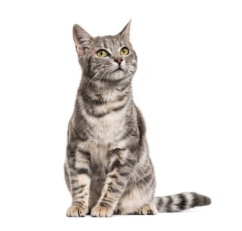

In [4]:
imshow(cat1)

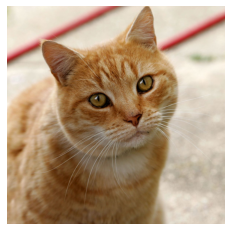

In [5]:
imshow(cat2)

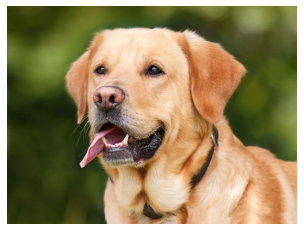

In [6]:
imshow(dog1)

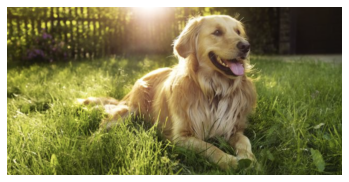

In [7]:
imshow(dog2)

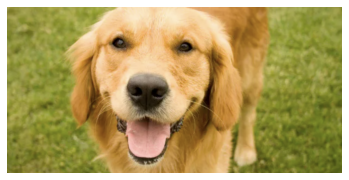

In [8]:
imshow(dog3)

In [9]:
sift_d = cv2.SIFT_create()
orb_d = cv2.ORB_create()

In [10]:
def detectAndCompute(detector, images):
     kps = []
     des = []
     # images = [cat1, cat2,dog, dog1, dog2,]
     for img in images:
          keypoint, descriptor = detector.detectAndCompute(img, None)
          kps.append(keypoint)
          kps.append(descriptor)
     return kps, des

images = [cat1, dog1, dog2, dog3]
sift_kp , sift_des = detectAndCompute(sift_d, images)
orb_kp, orb_des = detectAndCompute(orb_d, images)

In [11]:
len(sift_kp[4])

5799

In [12]:
for kp in sift_kp:
     print(len(kp))
print('.....')
for kp in orb_kp:
     print(len(kp))
          

1349
1349
555
555
5799
5799
626
626
.....
500
500
500
500
500
500
500
500


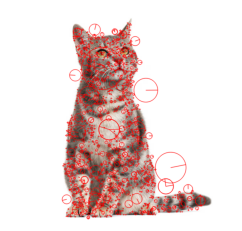

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'drawKeypoints'
> Overload resolution failed:
>  - Can't parse 'keypoints'. Sequence item with index 0 has a wrong type
>  - Can't parse 'keypoints'. Sequence item with index 0 has a wrong type


In [13]:
def drawKeypoints(img, kp):
    img_kp = cv2.drawKeypoints(
        img, kp, 1, (1,1,255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    imshow(img_kp)
    plt.show()

for img,kp in zip(images,sift_kp):
    drawKeypoints(img,kp)
for img,kp in zip(images,orb_kp):
    drawKeypoints(img,kp)

In [14]:
matcher = cv2.BFMatcher()

In [15]:
import numpy as np
def compare_des(query, descs, tol = 0.02, th = 0.95):
     results = []
     for des in descs:
          matches = matcher.match(query,des)
          matches = [val.distance for val in matches]
          mean = np.mean(matches)
          results.append(mean)
     return results

sift_res = compare_des(sift_des[-1], sift_des[:-1])
orb_res = compare_des(orb_des[-1], orb_des[:-1])
          
          

IndexError: list index out of range